In [1]:
#import libraries
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette("hls", 20)

In [2]:
#import data
xls_file = pd.ExcelFile('C:\\Users\\sonja tilly.ABERDEEN\\data270218.xlsx')

**Prep data**

In [3]:
#parse sheet
data = xls_file.parse('data_v_2')
data.index = data['Date']
del data['Date']
data.shape

(7364, 33)

In [4]:
data.columns

Index([u'FDTR Index', u'VIX Index', u'USGG5YR Index', u'USYC2Y10 Index',
       u'CPI YOY Index', u'USURTOT Index', u'OUTFGAF Index', u'CLA Comdty',
       u'CONSSENT Index', u'SCGRRAI Index', u'EMB US Equity',
       u'SPE AUTO Index', u'SPE CARD Index', u'LEI CHNG Index',
       u'GFSIFFND Index', u'XLF US Equity', u'XLE US Equity', u'XLK US Equity',
       u'XLV US Equity', u'XLI US Equity', u'XLY US Equity', u'XLB US Equity',
       u'PCUSEQTR Index', u'GFSIRLIQ Index', u'CIGMGRAM Index', u'SPX Index',
       u'US0003M Index', u'AHE YOY% Index', u'NHSPSTOT Index',
       u'NAPMNEWO Index', u'CPTICHNG Index', u'USGGBE05 Index',
       u'LF98OAS Index'],
      dtype='object')

In [5]:
#address data lags

data['USURTOT Index'] = data['USURTOT Index'].shift(5)
data['CPI YOY Index'] = data['CPI YOY Index'].shift(10)
data['AHE YOY% Index'] = data['AHE YOY% Index'].shift(10)
data['OUTFGAF Index'] = data['OUTFGAF Index'].shift(15)
data['CONSSENT Index'] = data['CONSSENT Index'].shift(15)
data['NHSPSTOT Index'] = data['NHSPSTOT Index'].shift(15)
data['CPTICHNG Index'] = data['CPTICHNG Index'].shift(15)
data['LEI CHNG Index'] = data['LEI CHNG Index'].shift(20)
data['SPE AUTO Index'] = data['SPE AUTO Index'].shift(30)
data['NAPMNEWO Index'] = data['NAPMNEWO Index'].shift(30)

data = data.fillna(0)
data.shape

(7364, 33)

**Transform features**

In [6]:
#convert index to datetime object
data.index = pd.to_datetime(data.index)


In [7]:
# these are the transformations applied to each indicator
# the transformations of the n variables create n new columns of the transformed variable which then run through the classifiers
# add zscore formula to LevelChange and PctChange

from scipy import stats

window = [30, 90, 365, 1095, 1825]
window2 = [365, 1095, 1825]

def LevelChange (indicator, window): #calculate the monthly change in the indicator, window expressed in Months
    days=int(window)
    data[str(indicator)+' change in '+str(window)+'ds']=data[indicator]-data[indicator].shift(days)
    #data[str(indicator)+' change in '+str(window)+'ds' +'zscore']=stats.zscore(data[indicator], axis=None)
    
def PctChange (indicator,window): #calculate the monthly percentage change in the indicator, window expressed in Months
    days=int(window)
    data[str(indicator)+' %change in '+str(window)+'ds']=data[indicator]/data[indicator].shift(days)-1
    #data[str(indicator)+' change in '+str(window)+'ds' +'zscore']=stats.zscore(data[indicator], axis=None)
    
def Zscore (indicator,window):  # calculate a Z score over a number of trading days
    mean=data[indicator].rolling(window).mean()
    std=data[indicator].rolling(window).std()
    data[str(indicator)+str(window)+'zscore']=(data[indicator]-mean)/std
 

In [8]:
# calculate ratios for equity subsector indices

data['XLF US Equity_ratio'] = data['XLF US Equity']/data['SPX Index']
data['XLE US Equity_ratio'] = data['XLE US Equity']/data['SPX Index']
data['XLK US Equity_ratio'] = data['XLK US Equity']/data['SPX Index']
data['XLV US Equity_ratio'] = data['XLV US Equity']/data['SPX Index']
data['XLI US Equity_ratio'] = data['XLI US Equity']/data['SPX Index']
data['XLY US Equity_ratio'] = data['XLY US Equity']/data['SPX Index']
data['XLB US Equity_ratio'] = data['XLB US Equity']/data['SPX Index']

data = data.drop(data[['XLF US Equity', 'XLE US Equity', 'XLK US Equity', 'XLV US Equity',
                  'XLI US Equity', 'XLY US Equity', 'XLB US Equity']], axis=1)

In [9]:
# calculate z-scores for daily data

cols1 = ['CLA Comdty', 'SCGRRAI Index', 'EMB US Equity', 'GFSIRLIQ Index', 'CIGMGRAM Index', 
        'FDTR Index', 'VIX Index', 'USGG5YR Index', 'USYC2Y10 Index', 'GFSIFFND Index',
        'PCUSEQTR Index', 'SPX Index', 'US0003M Index', 'USGGBE05 Index',
        'XLF US Equity_ratio', 'XLE US Equity_ratio', 'XLK US Equity_ratio',
         'XLV US Equity_ratio', 'XLI US Equity_ratio', 'XLY US Equity_ratio', 'XLB US Equity_ratio']

for i in window:
    for col in cols1:
        Zscore (col,i)


In [10]:
# calculate z-scores for monthly data

cols2 = ['USURTOT Index', 'CPI YOY Index', 'AHE YOY% Index', 'OUTFGAF Index', 'CONSSENT Index',
        'NHSPSTOT Index', 'CPTICHNG Index', 'LEI CHNG Index', 'SPE AUTO Index',
        'NAPMNEWO Index']

for i in window2:
    for col in cols2:
        Zscore (col,i)

In [11]:
for i in window:
    LevelChange('USURTOT Index', i)
    LevelChange('CPI YOY Index', i)
    LevelChange('AHE YOY% Index', i)
    LevelChange('OUTFGAF Index', i)
    LevelChange('CONSSENT Index', i)
    LevelChange('NHSPSTOT Index', i)
    LevelChange('CPTICHNG Index', i)
    LevelChange('LEI CHNG Index', i)
    LevelChange('SPE AUTO Index', i)
    LevelChange('NAPMNEWO Index', i)
    LevelChange('FDTR Index', i)
    LevelChange('VIX Index', i)
    LevelChange('USGG5YR Index', i)
    LevelChange('USYC2Y10 Index', i)
    LevelChange('GFSIFFND Index', i)
    LevelChange('PCUSEQTR Index', i)
    LevelChange('US0003M Index', i)
    LevelChange('USGGBE05 Index', i)
    LevelChange('LF98OAS Index', i)
    LevelChange('XLF US Equity_ratio', i)
    LevelChange('XLE US Equity_ratio', i)
    LevelChange('XLK US Equity_ratio', i)
    LevelChange('XLV US Equity_ratio', i)
    LevelChange('XLI US Equity_ratio', i)
    LevelChange('XLY US Equity_ratio', i)
    LevelChange('XLB US Equity_ratio', i)
    

In [12]:
for i in window:
    PctChange('CPI YOY Index',i)
    PctChange('CLA Comdty',i)
    PctChange('EMB US Equity',i)
    PctChange('SCGRRAI Index',i)
    PctChange('GFSIRLIQ Index',i)
    PctChange('CIGMGRAM Index',i)
    PctChange('SPX Index',i)

In [13]:
data.head(2)

,FDTR Index,VIX Index,USGG5YR Index,USYC2Y10 Index,CPI YOY Index,USURTOT Index,OUTFGAF Index,CLA Comdty,CONSSENT Index,SCGRRAI Index,EMB US Equity,SPE AUTO Index,SPE CARD Index,LEI CHNG Index,GFSIFFND Index,PCUSEQTR Index,GFSIRLIQ Index,CIGMGRAM Index,SPX Index,US0003M Index,AHE YOY% Index,NHSPSTOT Index,NAPMNEWO Index,CPTICHNG Index,USGGBE05 Index,LF98OAS Index,XLF US Equity_ratio,XLE US Equity_ratio,XLK US Equity_ratio,XLV US Equity_ratio,XLI US Equity_ratio,XLY US Equity_ratio,XLB US Equity_ratio,CLA Comdty30zscore,SCGRRAI Index30zscore,EMB US Equity30zscore,GFSIRLIQ Index30zscore,CIGMGRAM Index30zscore,FDTR Index30zscore,VIX Index30zscore,USGG5YR Index30zscore,USYC2Y10 Index30zscore,GFSIFFND Index30zscore,PCUSEQTR Index30zscore,SPX Index30zscore,US0003M Index30zscore,USGGBE05 Index30zscore,XLF US Equity_ratio30zscore,XLE US Equity_ratio30zscore,XLK US Equity_ratio30zscore,XLV US Equity_ratio30zscore,XLI US Equity_ratio30zscore,XLY US Equity_ratio30zscore,XLB US Equity_ratio30zscore,CLA Comdty90zscore,SCGRRAI Index90zscore,EMB US Equity90zscore,GFSIRLIQ Index90zscore,CIGMGRAM Index90zscore,FDTR Index90zscore,VIX Index90zscore,USGG5YR Index90zscore,USYC2Y10 Index90zscore,GFSIFFND Index90zscore,PCUSEQTR Index90zscore,SPX Index90zscore,US0003M Index90zscore,USGGBE05 Index90zscore,XLF US Equity_ratio90zscore,XLE US Equity_ratio90zscore,XLK US Equity_ratio90zscore,XLV US Equity_ratio90zscore,XLI US Equity_ratio90zscore,XLY US Equity_ratio90zscore,XLB US Equity_ratio90zscore,CLA Comdty365zscore,SCGRRAI Index365zscore,EMB US Equity365zscore,GFSIRLIQ Index365zscore,CIGMGRAM Index365zscore,FDTR Index365zscore,VIX Index365zscore,USGG5YR Index365zscore,USYC2Y10 Index365zscore,GFSIFFND Index365zscore,PCUSEQTR Index365zscore,SPX Index365zscore,US0003M Index365zscore,USGGBE05 Index365zscore,XLF US Equity_ratio365zscore,XLE US Equity_ratio365zscore,XLK US Equity_ratio365zscore,XLV US Equity_ratio365zscore,XLI US Equity_ratio365zscore,XLY US Equity_ratio365zscore,XLB US Equity_ratio365zscore,CLA Comdty1095zscore,SCGRRAI Index1095zscore,EMB US Equity1095zscore,GFSIRLIQ Index1095zscore,CIGMGRAM Index1095zscore,FDTR Index1095zscore,VIX Index1095zscore,USGG5YR Index1095zscore,USYC2Y10 Index1095zscore,GFSIFFND Index1095zscore,PCUSEQTR Index1095zscore,SPX Index1095zscore,US0003M Index1095zscore,USGGBE05 Index1095zscore,XLF US Equity_ratio1095zscore,XLE US Equity_ratio1095zscore,XLK US Equity_ratio1095zscore,XLV US Equity_ratio1095zscore,XLI US Equity_ratio1095zscore,XLY US Equity_ratio1095zscore,XLB US Equity_ratio1095zscore,CLA Comdty1825zscore,SCGRRAI Index1825zscore,EMB US Equity1825zscore,GFSIRLIQ Index1825zscore,CIGMGRAM Index1825zscore,FDTR Index1825zscore,VIX Index1825zscore,USGG5YR Index1825zscore,USYC2Y10 Index1825zscore,GFSIFFND Index1825zscore,PCUSEQTR Index1825zscore,SPX Index1825zscore,US0003M Index1825zscore,USGGBE05 Index1825zscore,XLF US Equity_ratio1825zscore,XLE US Equity_ratio1825zscore,XLK US Equity_ratio1825zscore,XLV US Equity_ratio1825zscore,XLI US Equity_ratio1825zscore,XLY US Equity_ratio1825zscore,XLB US Equity_ratio1825zscore,USURTOT Index365zscore,CPI YOY Index365zscore,AHE YOY% Index365zscore,OUTFGAF Index365zscore,CONSSENT Index365zscore,NHSPSTOT Index365zscore,CPTICHNG Index365zscore,LEI CHNG Index365zscore,SPE AUTO Index365zscore,NAPMNEWO Index365zscore,USURTOT Index1095zscore,CPI YOY Index1095zscore,AHE YOY% Index1095zscore,OUTFGAF Index1095zscore,CONSSENT Index1095zscore,NHSPSTOT Index1095zscore,CPTICHNG Index1095zscore,LEI CHNG Index1095zscore,SPE AUTO Index1095zscore,NAPMNEWO Index1095zscore,USURTOT Index1825zscore,CPI YOY Index1825zscore,AHE YOY% Index1825zscore,OUTFGAF Index1825zscore,CONSSENT Index1825zscore,NHSPSTOT Index1825zscore,CPTICHNG Index1825zscore,LEI CHNG Index1825zscore,SPE AUTO Index1825zscore,NAPMNEWO Index1825zscore,USURTOT Index change in 30ds,CPI YOY Index change in 30ds,AHE YOY% Index change in 30ds,OUTFGAF Index change in 30ds,CONSSENT Index change in 30ds,NHSPSTOT Index change in 30ds,CP

In [14]:
# Transform target variable into binary classification
# Shift target feature by xx days - predict signal xx days into the future

data['LF98OAS Index change in 30ds'] = data['LF98OAS Index change in 30ds'].shift(-5)

data['Signal'] = [1 if i >= abs(0.3) else 0 for i in data['LF98OAS Index change in 30ds']]
 
data['Signal'].value_counts()

0    5776
1    1588
Name: Signal, dtype: int64

**Plot the classes**

([], <a list of 0 Text xticklabel objects>)

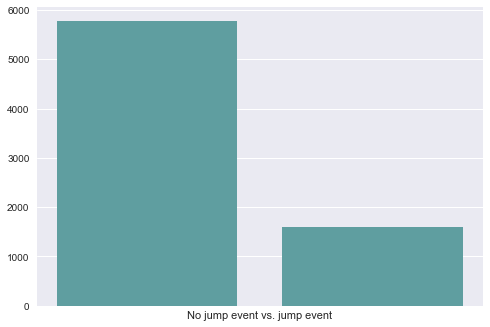

In [15]:
plt.hist(data['Signal'], bins=range(0,3), rwidth=0.8, color='cadetblue')

plt.xlabel(('No jump event vs. jump event'))
plt.xticks([])

*This is an imbalanced dataset - resampling is required.*

**Define input and target variables**

In [16]:
# target

y = data['Signal'].fillna(0)

# remove features relating to target from dataset

X_prel = data.drop(['LF98OAS Index', 'LF98OAS Index change in 30ds','LF98OAS Index change in 90ds',\
          'LF98OAS Index change in 365ds', 'LF98OAS Index change in 1095ds',\
          'LF98OAS Index change in 1825ds', 'Signal'], axis=1)

In [17]:
#check if X contains any column related to target variable

cols = list(X_prel.columns)

for col in cols:
    if "LF98OAS" in col:
        print (col)

**Calculate class weights**

In [18]:
naive = data['Signal'].value_counts()# naive prediction
print(naive)


0    5776
1    1588
Name: Signal, dtype: int64


In [19]:
def weight(cl):
    if cl==1:
        return naive[0].astype(float)/naive[1].astype(float)
    else:
        return 1

wgt = y.apply(weight)


In [20]:
wgt.value_counts()

1.00000    5776
3.63728    1588
Name: Signal, dtype: int64

In [21]:
#address inf and nan values
X_tidy = X_prel.replace([np.inf, -np.inf], np.nan).fillna(0)


In [22]:
# remove remaining original indices

remaining = ['FDTR Index', 'VIX Index', 'USGG5YR Index', 'USYC2Y10 Index',
       'CPI YOY Index', 'USURTOT Index', 'OUTFGAF Index', 'CLA Comdty',
       'CONSSENT Index', 'SCGRRAI Index', 'EMB US Equity', 'SPE AUTO Index',
       'SPE CARD Index', 'LEI CHNG Index', 'GFSIFFND Index', 
       'PCUSEQTR Index', 'GFSIRLIQ Index', 'CIGMGRAM Index', 'SPX Index', 
        'US0003M Index', 'AHE YOY% Index', 'NHSPSTOT Index', 'NAPMNEWO Index',
        'CPTICHNG Index', 'USGGBE05 Index', 'XLF US Equity_ratio', 'XLE US Equity_ratio',
             'XLK US Equity_ratio', 'XLV US Equity_ratio', 'XLI US Equity_ratio',
             'XLY US Equity_ratio', 'XLB US Equity_ratio']

X = X_tidy.drop(X_tidy[remaining], axis=1)


In [23]:
#split out training and testing sets

X_train = X[:5301]
y_train = y[:5301]
X_test = X[5301:]
y_test = y[5301:]
y_test.value_counts()

0    1712
1     351
Name: Signal, dtype: int64

In [24]:
X_test.head(1)

,CLA Comdty30zscore,SCGRRAI Index30zscore,EMB US Equity30zscore,GFSIRLIQ Index30zscore,CIGMGRAM Index30zscore,FDTR Index30zscore,VIX Index30zscore,USGG5YR Index30zscore,USYC2Y10 Index30zscore,GFSIFFND Index30zscore,PCUSEQTR Index30zscore,SPX Index30zscore,US0003M Index30zscore,USGGBE05 Index30zscore,XLF US Equity_ratio30zscore,XLE US Equity_ratio30zscore,XLK US Equity_ratio30zscore,XLV US Equity_ratio30zscore,XLI US Equity_ratio30zscore,XLY US Equity_ratio30zscore,XLB US Equity_ratio30zscore,CLA Comdty90zscore,SCGRRAI Index90zscore,EMB US Equity90zscore,GFSIRLIQ Index90zscore,CIGMGRAM Index90zscore,FDTR Index90zscore,VIX Index90zscore,USGG5YR Index90zscore,USYC2Y10 Index90zscore,GFSIFFND Index90zscore,PCUSEQTR Index90zscore,SPX Index90zscore,US0003M Index90zscore,USGGBE05 Index90zscore,XLF US Equity_ratio90zscore,XLE US Equity_ratio90zscore,XLK US Equity_ratio90zscore,XLV US Equity_ratio90zscore,XLI US Equity_ratio90zscore,XLY US Equity_ratio90zscore,XLB US Equity_ratio90zscore,CLA Comdty365zscore,SCGRRAI Index365zscore,EMB US Equity365zscore,GFSIRLIQ Index365zscore,CIGMGRAM Index365zscore,FDTR Index365zscore,VIX Index365zscore,USGG5YR Index365zscore,USYC2Y10 Index365zscore,GFSIFFND Index365zscore,PCUSEQTR Index365zscore,SPX Index365zscore,US0003M Index365zscore,USGGBE05 Index365zscore,XLF US Equity_ratio365zscore,XLE US Equity_ratio365zscore,XLK US Equity_ratio365zscore,XLV US Equity_ratio365zscore,XLI US Equity_ratio365zscore,XLY US Equity_ratio365zscore,XLB US Equity_ratio365zscore,CLA Comdty1095zscore,SCGRRAI Index1095zscore,EMB US Equity1095zscore,GFSIRLIQ Index1095zscore,CIGMGRAM Index1095zscore,FDTR Index1095zscore,VIX Index1095zscore,USGG5YR Index1095zscore,USYC2Y10 Index1095zscore,GFSIFFND Index1095zscore,PCUSEQTR Index1095zscore,SPX Index1095zscore,US0003M Index1095zscore,USGGBE05 Index1095zscore,XLF US Equity_ratio1095zscore,XLE US Equity_ratio1095zscore,XLK US Equity_ratio1095zscore,XLV US Equity_ratio1095zscore,XLI US Equity_ratio1095zscore,XLY US Equity_ratio1095zscore,XLB US Equity_ratio1095zscore,CLA Comdty1825zscore,SCGRRAI Index1825zscore,EMB US Equity1825zscore,GFSIRLIQ Index1825zscore,CIGMGRAM Index1825zscore,FDTR Index1825zscore,VIX Index1825zscore,USGG5YR Index1825zscore,USYC2Y10 Index1825zscore,GFSIFFND Index1825zscore,PCUSEQTR Index1825zscore,SPX Index1825zscore,US0003M Index1825zscore,USGGBE05 Index1825zscore,XLF US Equity_ratio1825zscore,XLE US Equity_ratio1825zscore,XLK US Equity_ratio1825zscore,XLV US Equity_ratio1825zscore,XLI US Equity_ratio1825zscore,XLY US Equity_ratio1825zscore,XLB US Equity_ratio1825zscore,USURTOT Index365zscore,CPI YOY Index365zscore,AHE YOY% Index365zscore,OUTFGAF Index365zscore,CONSSENT Index365zscore,NHSPSTOT Index365zscore,CPTICHNG Index365zscore,LEI CHNG Index365zscore,SPE AUTO Index365zscore,NAPMNEWO Index365zscore,USURTOT Index1095zscore,CPI YOY Index1095zscore,AHE YOY% Index1095zscore,OUTFGAF Index1095zscore,CONSSENT Index1095zscore,NHSPSTOT Index1095zscore,CPTICHNG Index1095zscore,LEI CHNG Index1095zscore,SPE AUTO Index1095zscore,NAPMNEWO Index1095zscore,USURTOT Index1825zscore,CPI YOY Index1825zscore,AHE YOY% Index1825zscore,OUTFGAF Index1825zscore,CONSSENT Index1825zscore,NHSPSTOT Index1825zscore,CPTICHNG Index1825zscore,LEI CHNG Index1825zscore,SPE AUTO Index1825zscore,NAPMNEWO Index1825zscore,USURTOT Index change in 30ds,CPI YOY Index change in 30ds,AHE YOY% Index change in 30ds,OUTFGAF Index change in 30ds,CONSSENT Index change in 30ds,NHSPSTOT Index change in 30ds,CPTICHNG Index change in 30ds,LEI CHNG Index change in 30ds,SPE AUTO Index change in 30ds,NAPMNEWO Index change in 30ds,FDTR Index change in 30ds,VIX Index change in 30ds,USGG5YR Index change in 30ds,USYC2Y10 Index change in 30ds,GFSIFFND Index change in 30ds,PCUSEQTR Index change in 30ds,US0003M Index change in 30ds,USGGBE05 Index change in 30ds,XLF US Equity_ratio change in 30ds,XLE US Equity_ratio change in 30ds,XLK US Equity_ratio change in 30ds,XLV US Equity_ratio change in 30ds,XLI US Equity_rat

**Gradient Boosted Trees**

In [25]:
#try Gradient Boosted Trees

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# tuning the number of leaves
group = []
for i in np.linspace(10,20,num=11):
    i=int(i)
    params = {'n_estimators': 500, 'max_depth': 10, 'max_features': 0.4,
          'learning_rate': 0.01, 'max_leaf_nodes': i, 'random_state': 47}

    gbc = GradientBoostingClassifier(**params)

    gbc.fit(X_train, y_train,sample_weight=wgt[:5301])
    
    tscv = TimeSeriesSplit(n_splits=3)
    
    scores = cross_val_score(gbc, X_train, y_train, cv=tscv, scoring='neg_log_loss')
    group.append((i, log_loss(y_test, gbc.predict_proba(X_test)[:,1]),
                  log_loss(y_train, gbc.predict_proba(X_train)[:,1]),
                  scores.mean(), scores.std()))
   

The actual log loss is simply the positive version of the negative log loss number.

SK-Learn's unified scoring API always maximizes the score, so scores which need to be minimized are negated in order for the unified scoring API to work correctly. The score that is returned is therefore negated when it is a score that should be minimized and left positive if it is a score that should be maximized.

In [26]:
print(group)

[(10, 0.35481523708501439, 0.15416271863205752, -0.62038797719856242, 0.30050826058476177), (11, 0.35653408862643937, 0.14430895535377689, -0.57661831177472767, 0.23254905610720078), (12, 0.36216231955455086, 0.13423767289895364, -0.55158472357270261, 0.21414518784202557), (13, 0.35831230928756114, 0.12559807841613294, -0.5360032608948907, 0.17639331499706354), (14, 0.35812195801365798, 0.11850198116154313, -0.52836074105482089, 0.16118873787132065), (15, 0.3615593584489904, 0.11195545625852477, -0.52842034892859535, 0.16217066126380517), (16, 0.36551715392054457, 0.10565126435568835, -0.52802017951469704, 0.15988847694117561), (17, 0.37220983919854, 0.10003397138726371, -0.53151981560008699, 0.15850315371639989), (18, 0.36088752653298273, 0.094767693948142578, -0.53327138436103239, 0.15388070052152156), (19, 0.36456115686749535, 0.089740870787860458, -0.53718735642514581, 0.1640179907478197), (20, 0.36743298459815582, 0.085685737854936966, -0.55146512893241295, 0.18053951407346552)]


**Plotting model performance**

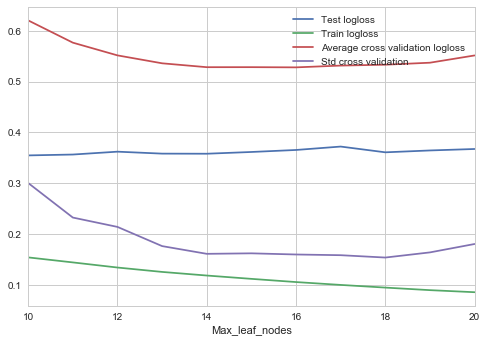

In [27]:
sns.set_style("whitegrid")

group_results = pd.DataFrame(data=group)
group_results.columns = ['Max_leaf_nodes','Test logloss','Train logloss',
                         'Average cross validation logloss','Std cross validation']
group_results = group_results.set_index('Max_leaf_nodes')
group_results['Average cross validation logloss'] = group_results['Average cross validation logloss'] * -1
group_results.plot()
plt.legend(loc = 'best')

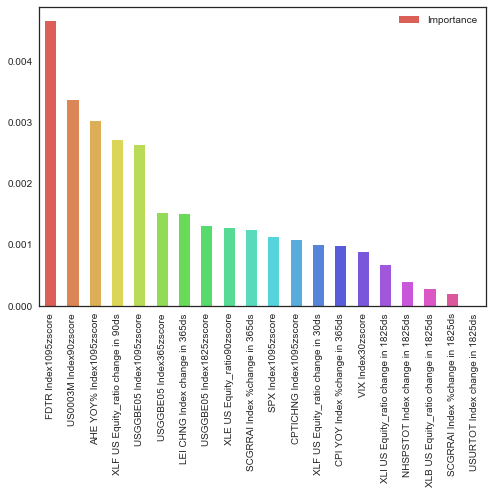

In [28]:
sns.set_style("white")

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, gbc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances[:20]
importances.sort_values(by='Importance', ascending=False).plot(kind='bar', rot=90, color=color)
plt.legend(loc = 'best')

In [29]:
y_pred = gbc.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index)
y_pred_train = gbc.predict_proba(X_train)
y_pred_train = pd.DataFrame(y_pred_train, index = y_train.index)

# how does the model perform on once reduced dataset?

Logloss = log_loss(y_test, y_pred[1])
Logloss_train = log_loss(y_train, y_pred_train[1])
print("The logloss score on the testing set for the model is {:.4f}.".format(Logloss))
print("The logloss score on the training set for the model is {:.4f}.".format(Logloss_train))

The logloss score on the testing set for the model is 0.3674.
The logloss score on the training set for the model is 0.0857.


In [30]:
import math
test_prob_BM = math.exp(-Logloss)
train_prob_BM = math.exp(-Logloss_train)
print(test_prob_BM, train_prob_BM)

(0.6925097340717352, 0.917882641667421)


**Feature elimination with cross-validation**

In [31]:
# try RFE with cross-validation

from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=gbc, scoring='neg_log_loss', step=1)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 9


In [33]:
feats2 = pd.DataFrame(rfecv.support_).transpose()
feats2.columns = X_test.columns
feats2 = feats2.transpose()
feats2.columns = ['True or False']
feats_new = feats2[feats2['True or False']==True]
feats_new_T = feats_new.transpose()

In [34]:
y_pred_rfecv = rfecv.predict_proba(X_test)
y_pred_rfecv = pd.DataFrame(y_pred_rfecv, index = y_test.index)
y_pred_train_rfecv = rfecv.predict_proba(X_train)
y_pred_train_rfecv = pd.DataFrame(y_pred_train_rfecv, index = y_train.index)

# how does the model perform on once reduced dataset?

Logloss_RFECV = log_loss(y_test, y_pred_rfecv[1])
Logloss__RFECV_train = log_loss(y_train, y_pred_train_rfecv[1])
print("The logloss score on the testing set for an optimised model is {:.4f}.".format(Logloss_RFECV))
print("The logloss score on the training set for the optimised model is {:.4f}.".format(Logloss__RFECV_train))


The logloss score on the testing set for an optimised model is 0.4187.
The logloss score on the training set for the optimised model is 0.1078.


In [35]:
test_prob_BM = math.exp(-Logloss_RFECV)
train_prob_BM = math.exp(-Logloss__RFECV_train)
print(test_prob_BM, train_prob_BM)

(0.6579170863567618, 0.8978449810719659)


In [36]:
cols_rfe = feats_new_T.columns

X_rfe = X[cols_rfe]
X_train_rfe = X_rfe[:5301]
y_train = y[:5301]
X_test_rfe = X_rfe[5301:]
y_test = y[5301:]

X_rfe.head(2)

,GFSIFFND Index90zscore,US0003M Index365zscore,XLF US Equity_ratio1095zscore,LEI CHNG Index365zscore,NAPMNEWO Index365zscore,OUTFGAF Index1095zscore,NAPMNEWO Index change in 90ds,VIX Index change in 90ds,SPX Index %change in 30ds
Date,,,,,,,,,
1998-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Addressing collinearity**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1])) # in Python3 use list(range(X.shape[1]))
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in range(X[variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[variables]

In [38]:
X_vif = calculate_vif_(X_rfe)

Remaining variables:
Index([u'GFSIFFND Index90zscore', u'US0003M Index365zscore',
       u'XLF US Equity_ratio1095zscore', u'LEI CHNG Index365zscore',
       u'NAPMNEWO Index365zscore', u'OUTFGAF Index1095zscore',
       u'NAPMNEWO Index change in 90ds', u'VIX Index change in 90ds',
       u'SPX Index %change in 30ds'],
      dtype='object')


In [39]:
X_train_vif = X_vif[:5301]
y_train = y[:5301]
X_test_vif = X_vif[5301:]
y_test = y[5301:]

In [87]:
# train model on reduced dataset

group2 = []
for i in np.linspace(10,20,num=11):
    i=int(i)
    params = {'n_estimators': 500, 'max_depth': 10, 'max_features': 9,
          'learning_rate': 0.01, 'max_leaf_nodes': i, 'random_state': 47}

    gbc2 = GradientBoostingClassifier(**params)

    gbc2.fit(X_train_vif, y_train,sample_weight=wgt[:5301])

    tscv = TimeSeriesSplit(n_splits=3)
    
    scores2 = cross_val_score(gbc2, X_train_vif, y_train, cv=tscv, scoring='neg_log_loss')
    group2.append((i, log_loss(y_test, gbc2.predict_proba(X_test_vif)[:,1]),
                  log_loss(y_train, gbc2.predict_proba(X_train_vif)[:,1]),
                  scores2.mean(), scores2.std()))
   

In [88]:
y_pred_vif = gbc2.predict_proba(X_test_vif)
y_pred_vif = pd.DataFrame(y_pred_vif, index = y_test.index)

y_pred_train_vif = gbc2.predict_proba(X_train_vif)
y_pred_train_vif = pd.DataFrame(y_pred_train_vif, index = y_train.index)

# how does the model perform on once reduced dataset?

Logloss_vif = log_loss(y_test, y_pred_vif[1])
Logloss_train_vif = log_loss(y_train, y_pred_train_vif[1])
print("The logloss score on the testing set after addressing collinearity is {:.4f}.".format(Logloss_vif))
print("The logloss score on the training set after addressing collinearity is {:.4f}.".format(Logloss_train_vif))

The logloss score on the testing set after addressing collinearity is 0.4049.
The logloss score on the training set after addressing collinearity is 0.1255.


In [89]:
# transform log loss metric into an average probability that model classifies accurately
import math
test_prob = math.exp(-Logloss_vif)
train_prob = math.exp(-Logloss_train_vif)

In [90]:
print(test_prob, train_prob)

(0.6670397083839018, 0.882060894209717)


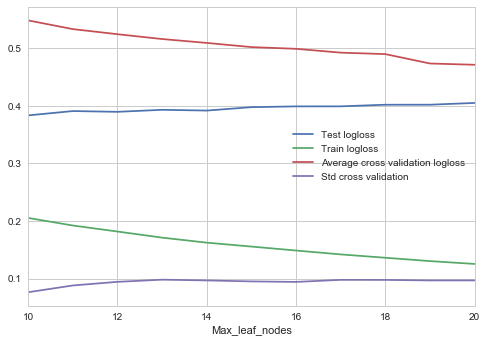

In [91]:
sns.set_style("whitegrid")

group_results2 = pd.DataFrame(data=group2)
group_results2.columns = ['Max_leaf_nodes','Test logloss','Train logloss',
                         'Average cross validation logloss','Std cross validation']
group_results2 = group_results2.set_index('Max_leaf_nodes')
group_results2['Average cross validation logloss'] = group_results2['Average cross validation logloss'] +1
group_results2
group_results2.plot()
plt.legend(loc = 'best')

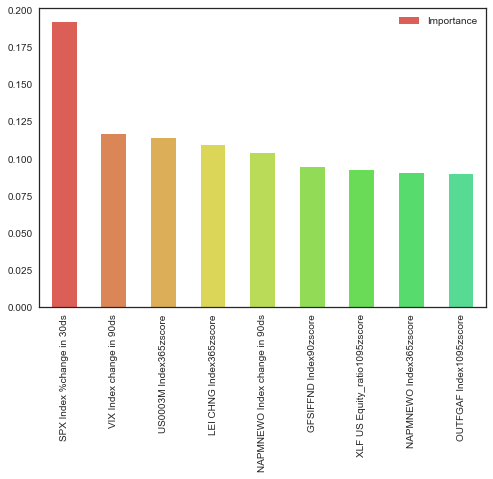

In [92]:
sns.set_style("white")

feats3 = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test_vif.columns, gbc2.feature_importances_):
    feats3[feature] = importance #add the name/value pair 

importances2 = pd.DataFrame.from_dict(feats3, orient='index').rename(columns={0: 'Importance'})
importances2 = importances2
importances2.sort_values(by='Importance', ascending=False)[:10].plot(kind='bar', rot=90, color=color)
plt.legend(loc = 'best')

**Plot Partial dependencies**

In [73]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence


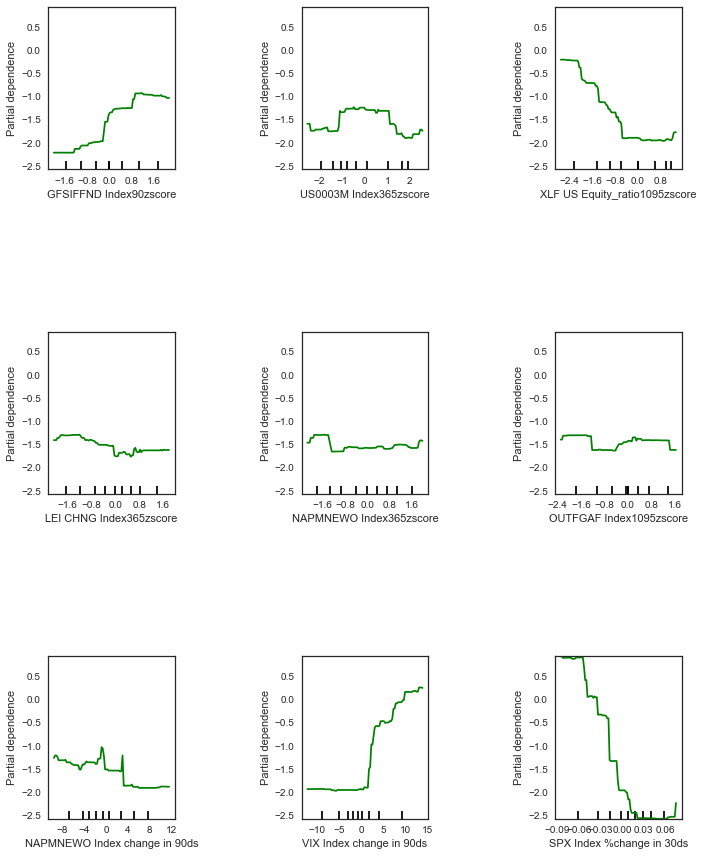

In [93]:
names = X_train_vif.columns



features = [0, 1, 2, 3, 4, 5, 6, 7, 8]
fig, axs = plot_partial_dependence(gbc2, X_train_vif, features,
                                   feature_names=names,
                                   n_jobs=1, n_cols= 3, grid_resolution=100)
plt.subplots_adjust(left=None, bottom=None, right=1.2, top=2.2,
                wspace=1, hspace=1)

**Benchmark model**

In [48]:
# build logistic regression model
# address unbalanced classes with parameter 'class_weights'
from sklearn.linear_model import LogisticRegression


estimator = LogisticRegression(random_state=42, class_weight={0:1, 1:3.63728}, n_jobs=-1)

estimator.fit(X_train, y_train)

y_pred_regr = estimator.predict_proba(X_test)
y_pred_regr = pd.DataFrame(y_pred_regr, index=y_test.index)

y_pred_regr_train = estimator.predict_proba(X_train)
y_pred_regr_train = pd.DataFrame(y_pred_regr_train, index=y_train.index)

# how does the basic model perform?

LogLoss3 = log_loss(y_test, y_pred_regr[1])
Logloss_train3 = log_loss(y_train, y_pred_regr_train[1])

print("The logloss on the training set for a simple Logistic Regression model is {:.4f}.".format(Logloss_train3))
print("The logloss on the testing set for a simple Logistic Regression model is {:.4f}.".format(LogLoss3))

The logloss on the training set for a simple Logistic Regression model is 0.2164.
The logloss on the testing set for a simple Logistic Regression model is 0.8327.


In [49]:
# transform log loss metric into an average probability that model classifies accurately
import math
test_prob_BM = math.exp(-LogLoss3)
train_prob_BM = math.exp(-Logloss_train3)
print(test_prob_BM, train_prob_BM)

(0.4348921695280084, 0.8054059262538517)
